In [1]:
import seaborn
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *

try:
    stopwords = set(stopwords.words('english'))
except LookupError:
    import nltk
    nltk.download('stopwords')
    stopwords = set(stopwords.words('english'))

try:
    import data_loader as dl
    from data_loader import path
except ImportError:
    dl = None
    raise ImportError('data_loader' + ' not imported')



In [2]:
import tensorflow as tf

# Import

In [3]:
d_l = dl.DataLoader(path + '/wiki.train.raw')

In [4]:
d_l.load()

In [5]:
ds = d_l.prepare()

In [6]:
ds

<ParallelMapDataset shapes: (None,), types: tf.string>

In [20]:
for x in ds.take(6).__iter__():
    tf.print(x)

["valkyria" "chronicles" "iii"]
["senj" "no" "valkyria" ... "chronicles" "japanese" "lit"]
["valkyria" "of" "the" ... "the" "playstation" "portable"]
["released" "in" "january" ... "the" "valkyria" "series"]
["employing" "the" "same" ... "unit" "calamaty" "raven"]
["the" "game" "began" ... "valkyria" "chronicles" "ii"]


# Frequencies

In [17]:
def cardinality_of_words(dataset):
    
    cardinalities = {}
    
    for seq in dataset.__iter__():
        for word in seq:
            word = word.numpy()
            if word not in cardinalities:
                cardinalities[word] = 1
            else:
                cardinalities[word] += 1
    
    return cardinalities

            

In [21]:
cardinalities = cardinality_of_words(ds)

In [27]:
sorted_cardinalities = {k: v for k, v in sorted(cardinalities.items(), key = lambda item: item[1], reverse = True)}

In [42]:
sorted_cardinalities

{b'the': 130769,
 b'of': 57032,
 b'and': 50736,
 b'in': 45017,
 b'to': 39522,
 b'a': 36545,
 b'was': 21008,
 b's': 15744,
 b'on': 15145,
 b'as': 15062,
 b'that': 14351,
 b'for': 13794,
 b'with': 13012,
 b'by': 12718,
 b'is': 11692,
 b'it': 9277,
 b'from': 9229,
 b'at': 9071,
 b'his': 9020,
 b'he': 8717,
 b'were': 7334,
 b'an': 6251,
 b'had': 5707,
 b'which': 5546,
 b'be': 4867,
 b'are': 4714,
 b'this': 4560,
 b'their': 4290,
 b'first': 4245,
 b'but': 4233,
 b'not': 4006,
 b'one': 3914,
 b'they': 3894,
 b'its': 3878,
 b'also': 3842,
 b'after': 3749,
 b'her': 3670,
 b'or': 3657,
 b'two': 3565,
 b'have': 3470,
 b'has': 3325,
 b'been': 3263,
 b'who': 3029,
 b'she': 2884,
 b'new': 2768,
 b'other': 2729,
 b'during': 2690,
 b'when': 2655,
 b'time': 2607,
 b'th': 2568,
 b'all': 2558,
 b'into': 2443,
 b'more': 2402,
 b'would': 2332,
 b'i': 2188,
 b'over': 2137,
 b'while': 2127,
 b'game': 2077,
 b'only': 2061,
 b'most': 2027,
 b'three': 1976,
 b'later': 1928,
 b'up': 1920,
 b'about': 1914,
 b'ma

In [35]:
common_words = list(sorted_cardinalities.items())[:30]

In [36]:
common_words[:6]

[(b'the', 130769),
 (b'of', 57032),
 (b'and', 50736),
 (b'in', 45017),
 (b'to', 39522),
 (b'a', 36545)]

In [37]:
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

# Plot

Text(0.5, 1.0, 'Most Common Words in this wikipedia samples')

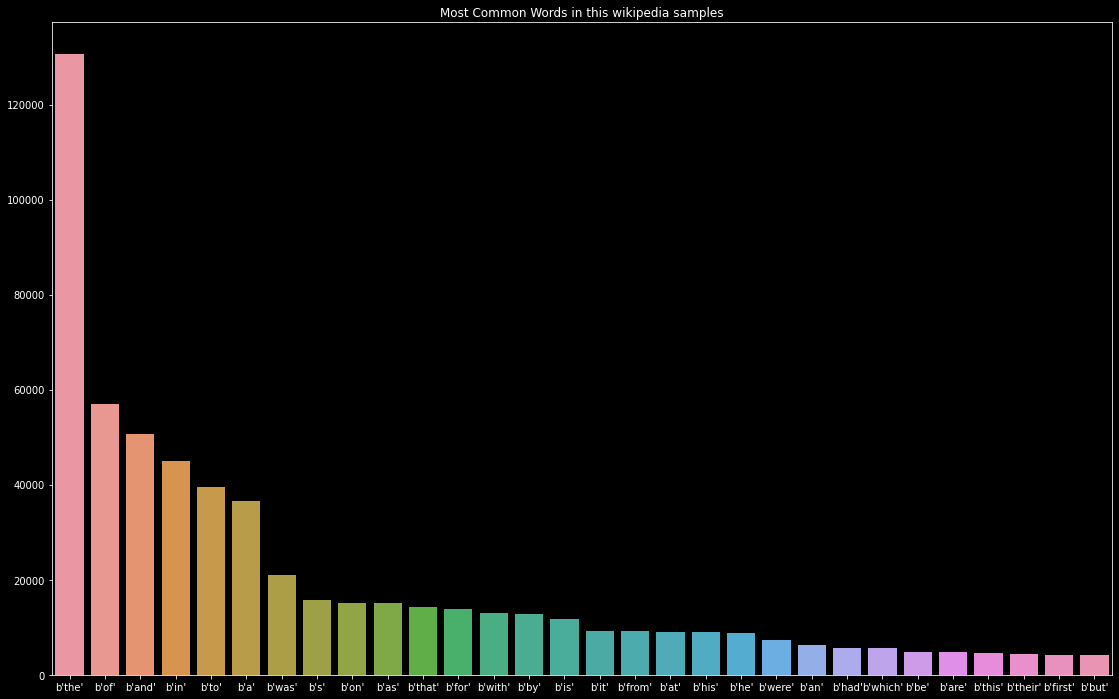

In [40]:
plt.style.use('dark_background')
plt.figure(figsize=(19, 12))

seaborn.barplot(x = words, y = counts)
plt.title('Most Common Words in this wikipedia samples')

the is the most used word, this kind of words will be removed in the next part